# Lesson 16 - Voting Classifier for Titanic Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Load the Data

In [3]:
df = pd.read_csv('data/titanic.txt', sep='\t')
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Separate Numerical and Categorical Columns

In [4]:
Xnum = df.iloc[:, [4]].values
Xcat = df.iloc[:, [1, 3]].values.astype('str')
y = df.iloc[:, 0].values

### Scale Numerical Features

In [5]:
Xnum_train, Xnum_val, y_train, y_val = train_test_split(Xnum, y, test_size = 0.2, random_state=1)

print(Xnum_train.shape)
print(Xnum_val.shape)

(709, 1)
(178, 1)


In [6]:
scaler = StandardScaler()
scaler.fit(Xnum_train)

Xsca_train = scaler.transform(Xnum_train)
Xsca_val = scaler.transform(Xnum_val)

print(Xsca_train.shape)
print(Xsca_val.shape)

(709, 1)
(178, 1)


### Encode Categorical Features

In [7]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(Xcat)

Xenc = encoder.transform(Xcat)

print(Xenc.shape)

(887, 5)


In [8]:
Xenc_train, Xenc_val, y_train, y_val = train_test_split(Xenc, y, test_size = 0.2, random_state=1)
print(Xenc_train.shape)
print(Xenc_val.shape)


(709, 5)
(178, 5)


### Merge Feature Arrays

In [9]:
X_train = np.hstack([Xsca_train, Xenc_train])
X_val = np.hstack([Xsca_val, Xenc_val])

print(X_train.shape)
print(X_val.shape)

(709, 6)
(178, 6)


Below we compare SIX different models:

mod1 - Logistic Regression with the optimal regularization parameter C

mod2 - KNN model with the optimal number of neighbors K

mod3 - Decision Tree model with the optimal tree depth  d

mod4 - Voting Classifier with mod1, mod2, mod3

mod5 - Voting Classifier with  mod2, mod3 only

mod6 - Voting Classifier with three different KNNs and three different DTs

## Model 01: Logistic Regression

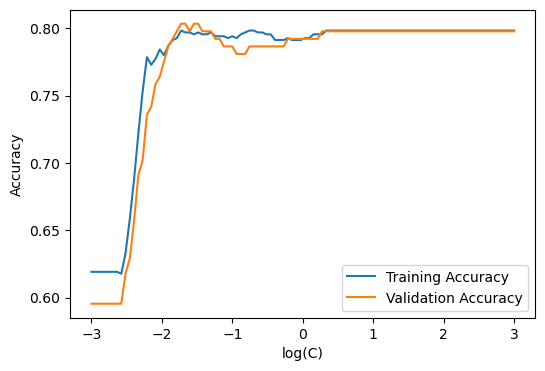

In [10]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-3, 3, 100)

for k in exp_list:
    temp_mod = LogisticRegression(solver='lbfgs', C=10**k, multi_class='auto')
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
idx = np.argmax(va_acc)
best_logC = exp_list[idx]
print(best_logC)

-1.7272727272727273


In [11]:
mod_01 = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='auto')
mod_01.fit(X_train, y_train)

print('Training Accuracy:  ', mod_01.score(X_train, y_train))
print('Validation Accuracy:', mod_01.score(X_val, y_val))

Training Accuracy:   0.7983074753173484
Validation Accuracy: 0.8033707865168539


## Model 02: K-Nearest Neighbors

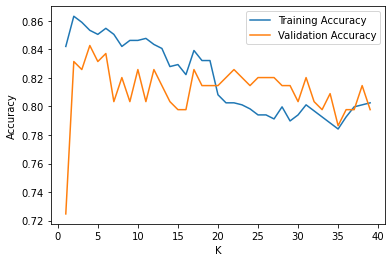

In [12]:
tr_acc = []
va_acc = []
K_list = range(1,40)

for k in K_list:
    temp_mod = KNeighborsClassifier(k)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(K_list, tr_acc, label='Training Accuracy')
plt.plot(K_list, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
idx = np.argmax(va_acc)
best_K = K_list[idx]
print(best_K)

4


In [14]:
mod_02 = KNeighborsClassifier(best_K)
mod_02.fit(X_train, y_train)

print('Training Accuracy:  ', mod_02.score(X_train, y_train))
print('Validation Accuracy:', mod_02.score(X_val, y_val))

Training Accuracy:   0.8533145275035261
Validation Accuracy: 0.8426966292134831


## Model 03: Decision Tree

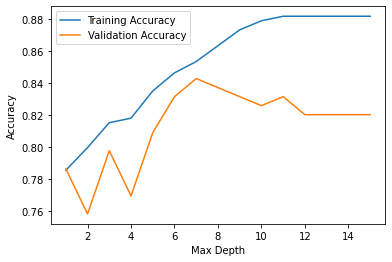

In [15]:
tr_acc = []
va_acc = []
depth_list = range(1,16)

np.random.seed(1)
for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

7


In [17]:
np.random.seed(1)
mod_03 = DecisionTreeClassifier(max_depth=best_d)
mod_03.fit(X_train, y_train)

print('Training Accuracy:  ', mod_03.score(X_train, y_train))
print('Validation Accuracy:', mod_03.score(X_val, y_val))

Training Accuracy:   0.8533145275035261
Validation Accuracy: 0.8426966292134831


## Model 04: Voting Classifier #1

In [18]:
mod_04 = VotingClassifier(
    estimators = [('lr', mod_01), ('knn', mod_02), ('tree', mod_03)],
    voting = 'soft'
)

mod_04.fit(X_train, y_train)

print('Training Accuracy:  ', mod_04.score(X_train, y_train))
print('Validation Accuracy:', mod_04.score(X_val, y_val))

Training Accuracy:   0.8519040902679831
Validation Accuracy: 0.8426966292134831


In [19]:
print('Model 01 Validation Accuracy:', mod_01.score(X_val, y_val))
print('Model 02 Validation Accuracy:', mod_02.score(X_val, y_val))
print('Model 03 Validation Accuracy:', mod_03.score(X_val, y_val))
print('Model 04 Validation Accuracy:', mod_04.score(X_val, y_val))

Model 01 Validation Accuracy: 0.8033707865168539
Model 02 Validation Accuracy: 0.8426966292134831
Model 03 Validation Accuracy: 0.8426966292134831
Model 04 Validation Accuracy: 0.8426966292134831


## Model 05: Voting Classifier #2

In [20]:
mod_05 = VotingClassifier(
    estimators = [('knn', mod_02), ('tree', mod_03)],
    voting = 'soft'
)

mod_05.fit(X_train, y_train)

print('Training Accuracy:  ', mod_05.score(X_train, y_train))
print('Validation Accuracy:', mod_05.score(X_val, y_val))

Training Accuracy:   0.8561354019746121
Validation Accuracy: 0.8539325842696629


In [21]:
print('Model 01 Validation Accuracy:', mod_01.score(X_val, y_val))
print('Model 02 Validation Accuracy:', mod_02.score(X_val, y_val))
print('Model 03 Validation Accuracy:', mod_03.score(X_val, y_val))
print('Model 04 Validation Accuracy:', mod_04.score(X_val, y_val))
print('Model 05 Validation Accuracy:', mod_05.score(X_val, y_val))


Model 01 Validation Accuracy: 0.8033707865168539
Model 02 Validation Accuracy: 0.8426966292134831
Model 03 Validation Accuracy: 0.8426966292134831
Model 04 Validation Accuracy: 0.8426966292134831
Model 05 Validation Accuracy: 0.8539325842696629


## Model 06: Voting Classifier #3

In [22]:
mod_06 = VotingClassifier(
    estimators = [
        ('clf_01', KNeighborsClassifier(1)), 
        ('clf_02', KNeighborsClassifier(2)), 
        ('clf_03', KNeighborsClassifier(3)),
        
        ('clf_04', DecisionTreeClassifier(max_depth=4)),
        ('clf_05', DecisionTreeClassifier(max_depth=5)), 
        ('clf_06', DecisionTreeClassifier(max_depth=6))
    ],
    voting = 'soft'
)

mod_06.fit(X_train, y_train)

print('Training Accuracy:  ', mod_06.score(X_train, y_train))
print('Validation Accuracy:', mod_06.score(X_val, y_val))

Training Accuracy:   0.8716502115655853
Validation Accuracy: 0.8033707865168539


## Comparison of the different Voting Classifiers for the Titanic dataset

In [23]:
print('Model 01 Validation Accuracy:', mod_01.score(X_val, y_val))
print('Model 02 Validation Accuracy:', mod_02.score(X_val, y_val))
print('Model 03 Validation Accuracy:', mod_03.score(X_val, y_val))
print('Model 04 Validation Accuracy:', mod_04.score(X_val, y_val))
print('Model 05 Validation Accuracy:', mod_05.score(X_val, y_val))
print('Model 06 Validation Accuracy:', mod_06.score(X_val, y_val))

Model 01 Validation Accuracy: 0.8033707865168539
Model 02 Validation Accuracy: 0.8426966292134831
Model 03 Validation Accuracy: 0.8426966292134831
Model 04 Validation Accuracy: 0.8426966292134831
Model 05 Validation Accuracy: 0.8539325842696629
Model 06 Validation Accuracy: 0.8033707865168539
